# Table of Contents - still adjust 
### Importing Libaries and Data Sets
### Task 5  Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents.
### Creating Flags for Age and Income Level
### Sampling Dataset 
### Checking Customer by Income Level, Age Group and Region
### Customers by Income Level and Age group
### Customers by Income Level and Region
### Customers by Marital Status and Region
### Customers by Region and Age
### Export Data Set

## 1. Importing libraries and data sets

In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import matplotlib as mpl

In [2]:
#creating pathway for dataframes
path = os.path.join(r'/Users/katja/Documents/Instacart Basket Analysis/02 Data')

In [3]:
#import orders_products_customer_updated (incl. the exclusion of 5 orders below)
ords_prods =pd.read_pickle(os.path.join(path,'Prepared Data', 'orders_products_customers_updated.pkl'))

In [14]:
#import departments_wrangled 
df_dep =pd.read_csv(os.path.join(path,'Prepared Data','departments_wrangled.csv'))

In [15]:
df_dep.shape

(21, 2)

In [16]:
#loading garbage collector
import gc

In [17]:
ords_prods.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30964564 entries, 0 to 32404854
Data columns (total 31 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   order_id                object        
 1   user_id                 object        
 2   clients_order_number    int8          
 3   orders_day_of_week      int8          
 4   order_hour_of_day       int8          
 5   days_since_prior_order  float32       
 6   product_id              int32         
 7   add_to_cart_order       int32         
 8   reordered               int8          
 9   product_name            object        
 10  aisle_id                int8          
 11  department_id           int8          
 12  prices                  float32       
 13  price_range_loc         object        
 14  busiest_days            object        
 15  busiest_period_of_day   object        
 16  max_order               int8          
 17  loyalty_flag            object        
 18  mean_

### Task 5. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_the_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

### Creating Flags for Age and Income Level

In [20]:
# Creating 'age_group' column to give each customer an age group flag.

ords_prods.loc[(ords_prods['age'] >= 18) & (ords_prods['age'] <= 32), 'age_group'] = 'Young Adult: 18-32'

In [21]:
ords_prods.loc[(ords_prods['age'] >= 33) & (ords_prods['age'] <= 48), 'age_group'] = 'Adult: 33-48'

In [22]:
ords_prods.loc[(ords_prods['age'] >= 49) & (ords_prods['age'] <= 64), 'age_group'] = 'Middleaged Adult: 49-64'

In [23]:
ords_prods.loc[(ords_prods['age'] >= 65), 'age_group'] = 'Senior: 65+'

In [24]:
# value counts for the new flag age_group (frequency)

ords_prods['age_group'].value_counts(dropna = False)

age_group
Senior: 65+                8195544
Adult: 33-48               7755276
Middleaged Adult: 49-64    7728610
Young Adult: 18-32         7285134
Name: count, dtype: int64

In [25]:
# Checking out put numbers

8195544 + 7755276 + 7728610 + 7285134

30964564

In [99]:
ords_prods.head()

,order_id,user_id,clients_order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,state,age,date_joined,n_dependants,marital_status,income,region,exclusion_flag,age_group,income_level
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Alabama,31,2019-02-17,3,married,40423,South,No,Young Adult: 18-32,Low Income
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Alabama,31,2019-02-17,3,married,40423,South,No,Young Adult: 18-32,Low Income
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Alabama,31,2019-02-17,3,married,40423,South,No,Young Adult: 18-32,Low Income
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Alabama,31,2019-02-17,3,married,40423,South,No,Young Adult: 18-32,Low Income
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Alabama,31,2019-02-17,3,married,40423,South,No,Young Adult: 18-32,Low Income


In [95]:
#Creating 'income_level' column to group customers income into 3 level: Low, Middle and High Income

ords_prods.loc[(ords_prods['income'] > 25000) & (ords_prods['income'] <= 67000), 'income_level'] = 'Low Income'

In [36]:
ords_prods.loc[(ords_prods['income'] >= 67001) & (ords_prods['income'] <= 127000), 'income_level'] = 'Middle Income'

In [37]:
ords_prods.loc[ords_prods['income'] > 127001, 'income_level'] = 'High Income'


In [38]:
# value counts for the new flag income_level (frequency)

ords_prods['income_level'].value_counts(dropna = False)

income_level
Middle Income    15370616
High Income       7932470
Lower Income      7661478
Name: count, dtype: int64

In [39]:
# Checking out put numbers

15370616+ 7932470 + 7661478

30964564

### Sampling Data Set

In [100]:
#creating 70/30 split for data sample
np.random.seed(4)
dev = np.random.rand(len(ords_prods)) <= 0.7

# store 70% of the sample in the df_big and 30% in df_small
df_big = ords_prods[dev]
df_small = ords_prods[~dev]

#quality check
len(df_big)+len(df_small)

30964564

In [43]:
len(df_small)

9288468

In [44]:
len(df_big)

21676096

### Checking Customer by Income Level, Age Group and Region

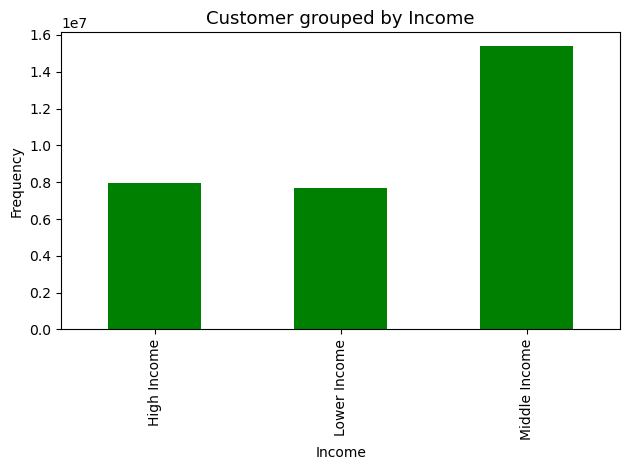

In [50]:
#bar chart on income_level value counts to see the distribution. Sorted by largest to smallest

plt.title('Customer grouped by Income', fontsize=13)
bar_cig = ords_prods['income_level'].value_counts().sort_index().plot.bar(color=['green'], xlabel='Income', ylabel='Frequency')

# Adjust the layout to ensure everything fits
plt.tight_layout()

### Export Barchart Customer Income Groups

In [51]:
bar_cig.figure.savefig(os.path.join(r'/Users/katja/Documents/Instacart Basket Analysis/04 Analysis/Visualizations/Customer_Income_Groups_bar.png'))

In [52]:
#delete df to save space 

del bar_cig

gc.collect()

13057

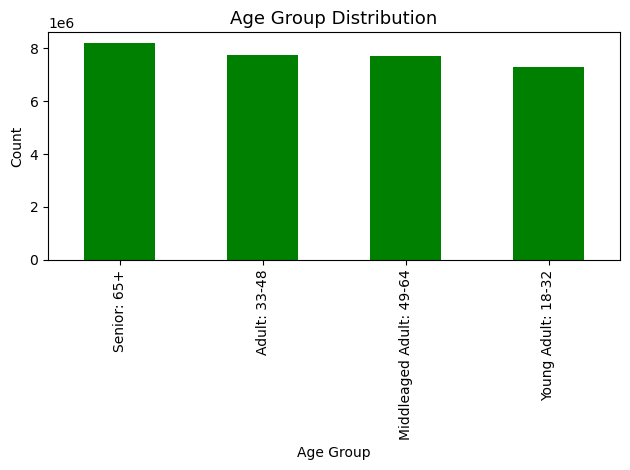

In [57]:
#bar chart on Age group value counts to see the distribution. 

plt.title('Age Group Distribution', fontsize=13)
bar_agd = ords_prods['age_group'].value_counts().plot.bar( color=['green'], xlabel='Age Group', ylabel='Count')

# Adjust the layout to ensure everything fits
plt.tight_layout()

### Export Barchart Age Group Distribution

In [58]:
bar_agd.figure.savefig(os.path.join(r'/Users/katja/Documents/Instacart Basket Analysis/04 Analysis/Visualizations/age_group_distribution_bar.png'))

In [59]:
#delete df to save space 

del bar_agd

gc.collect()

9943

## Customers by Income Level and Age group

In [61]:
# Extract age group and income level into a separate dataframe
df_age_income = df_small [['age_group', 'income_level']]
df_age_income.head()

,age_group,income_level
0,Young Adult: 18-32,Lower Income
2,Young Adult: 18-32,Lower Income
3,Young Adult: 18-32,Lower Income
6,Young Adult: 18-32,Lower Income
10,Young Adult: 18-32,Lower Income


In [89]:
#Creating new pivot table for 'age_group' and 'income_level'

df_age_incom = df_small.pivot_table(index='income_level', columns='age_group', values='order_id', aggfunc='count', fill_value=0)

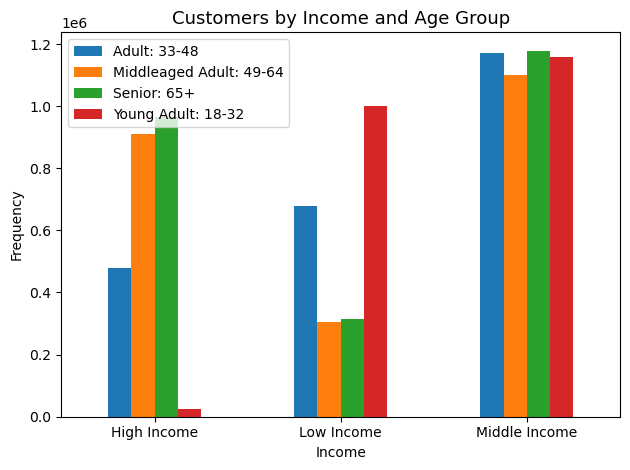

In [90]:
#bar chart on Customers by Income and Age Group

age_income_bar = df_age_incom.plot.bar()

# Add labels
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.title('Customers by Income and Age Group', fontsize=13)

# Add a legend
plt.legend(title='')

# Adjust x labels 
x = [0,1,2]
labels = ['High Income','Low Income', 'Middle Income']
plt.xticks(x, labels, rotation=360)

# Adjust the layout to ensure everything fits
plt.tight_layout()

### Export Barchart Customers by Income and Age Group

In [80]:
age_income_bar.figure.savefig(os.path.join(r'/Users/katja/Documents/Instacart Basket Analysis/04 Analysis/Visualizations/age_income_bar.png'))

In [91]:
#delete df to save space 

del df_age_incom
del age_income_bar

gc.collect()

4271

## Customers by Income Level and Region

In [101]:
#Creating new pivot table for 'region' and 'income_level'

df_income_region = df_small.pivot_table(index='region', columns='income_level', values='order_id', aggfunc='count', fill_value=0)

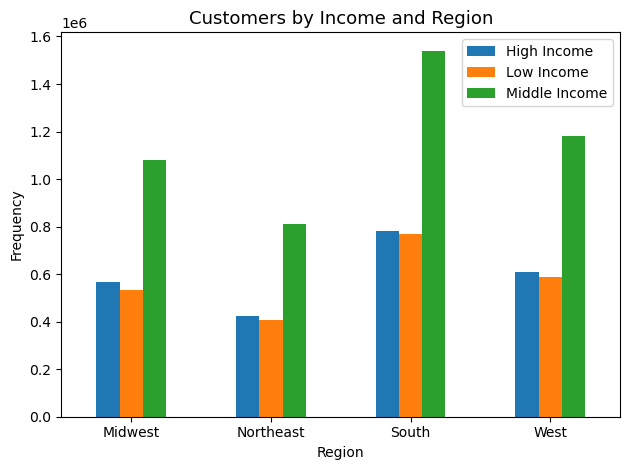

In [104]:
#bar chart on Customers by Income and Region

region_income_bar = df_income_region.plot.bar()

# Add labels
plt.xlabel('Region')
plt.ylabel('Frequency')
plt.title('Customers by Income and Region', fontsize=13)

# Add a legend
plt.legend(title='')

# Adjust x labels 
x = [0,1,2,3]
labels = ['Midwest','Northeast', 'South','West' ]
plt.xticks(x, labels, rotation=360)

# Adjust the layout to ensure everything fits
plt.tight_layout()

### Export Barchart Customers by Income and Region

In [105]:
region_income_bar.figure.savefig(os.path.join(r'/Users/katja/Documents/Instacart Basket Analysis/04 Analysis/Visualizations/region_income_bar.png'))

In [106]:
#delete df to save space 

del region_income_bar
del age_income_bar
del df_income_region

gc.collect()

20770

## Customers by Marital Status and Region

In [107]:
#Creating new pivot table for 'region' and 'marital status'

df_marital_region = df_small.pivot_table(index='region', columns='marital_status', values='order_id', aggfunc='count', fill_value=0)

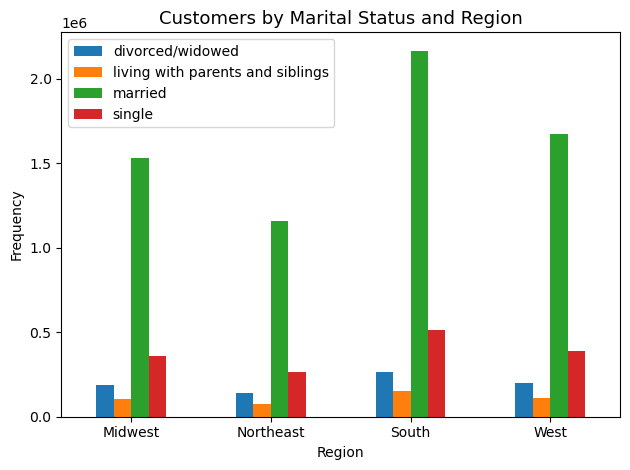

In [108]:
#bar chart on Customers by Marital Status and Region

region_income_bar = df_marital_region.plot.bar()

# Add labels
plt.xlabel('Region')
plt.ylabel('Frequency')
plt.title('Customers by Marital Status and Region', fontsize=13)

# Add a legend
plt.legend(title='')

# Adjust x labels 
x = [0,1,2,3]
labels = ['Midwest','Northeast', 'South','West' ]
plt.xticks(x, labels, rotation=360)

# Adjust the layout to ensure everything fits
plt.tight_layout()

In [110]:
# To normalize the column based on the number of customers in each region:
# First, calculate the total number of customers in each region

total_customers = df_small.groupby('region')['user_id'].count()

In [111]:
# Normalize the counts by dividing by the total customers in each region

result_normalized = df_marital_region.div(total_customers, axis=0)

In [112]:
result_normalized

marital_status,divorced/widowed,living with parents and siblings,married,single
region,,,,
Midwest,0.084758,0.048470,0.701003,0.165769
Northeast,0.087296,0.046981,0.705396,0.160327
South,0.085175,0.049240,0.700258,0.165326
West,0.084599,0.046262,0.704411,0.164727


In [113]:
# Multiply by 100 to gain result as a percentage
result_normalized_percent = result_normalized * 100

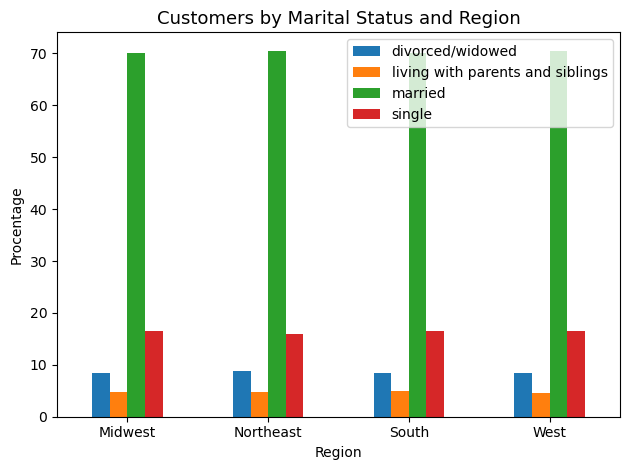

In [115]:
# Create a grouped bar chart from the result_normalized_percent results

region_income_bar_procen = result_normalized_percent.plot.bar()

# Add labels
plt.xlabel('Region')
plt.ylabel('Procentage')
plt.title('Customers by Marital Status and Region', fontsize=13)

# Add a legend
plt.legend(title='')

# Adjust x labels 
x = [0,1,2,3]
labels = ['Midwest','Northeast', 'South','West' ]
plt.xticks(x, labels, rotation=360)

# Adjust the layout to ensure everything fits
plt.tight_layout()

### Export Barchart Customers by Marital Status and Region (Frequency)

In [116]:
region_income_bar.figure.savefig(os.path.join(r'/Users/katja/Documents/Instacart Basket Analysis/04 Analysis/Visualizations/region_marital_freq_bar.png'))

### Export Barchart Customers by Marital Status and Region (Procentage)

In [117]:
region_income_bar_procen.figure.savefig(os.path.join(r'/Users/katja/Documents/Instacart Basket Analysis/04 Analysis/Visualizations/region_marital_procen_bar.png'))

In [118]:
#delete df to save space 

del df_marital_region
del region_income_bar
del total_customers

gc.collect()

8658

## Customers by Region and Age/ Income_Level

In [126]:
#Creating new pivot table for 'region' and 'income level'

df_income_region = df_small.pivot_table(index='region', columns='income_level', values='order_id', aggfunc='count', fill_value=0)

In [127]:
df_income_region

income_level,High Income,Low Income,Middle Income
region,,,
Midwest,568927,531414,1079081
Northeast,422618,406395,810001
South,781742,770765,1540414
West,606894,589587,1180630


In [128]:
#delete df to save space 

del df_income_region

gc.collect()


2429

In [129]:
#Creating new pivot table for 'region' and 'age group'

df_agegroup_region = df_small.pivot_table(index='region', columns='age_group', values='order_id', aggfunc='count', fill_value=0)

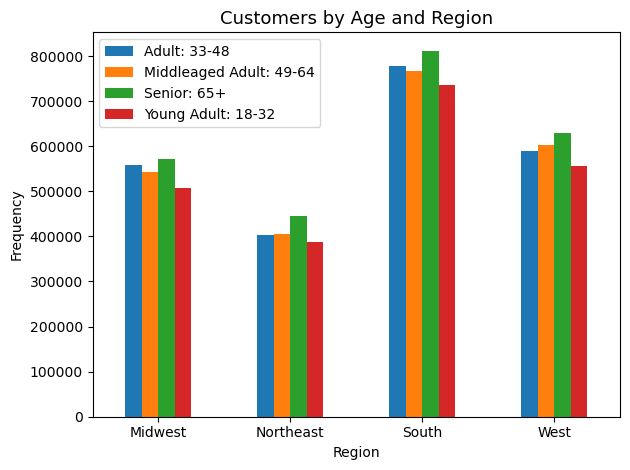

In [131]:
#bar chart on Customers by Age Group and Region

region_ag = df_agegroup_region.plot.bar()

# Add labels
plt.xlabel('Region')
plt.ylabel('Frequency')
plt.title('Customers by Age and Region', fontsize=13)

# Add a legend
plt.legend(title='')

# Adjust x labels 
x = [0,1,2,3]
labels = ['Midwest','Northeast', 'South','West' ]
plt.xticks(x, labels, rotation=360)

# Adjust the layout to ensure everything fits
plt.tight_layout()

### Export Barchart Customers by Age Group & Region

In [133]:
region_ag.figure.savefig(os.path.join(r'/Users/katja/Documents/Instacart Basket Analysis/04 Analysis/Visualizations/region_agegroup_bar.png'))

In [134]:
#delete df to save space 

del region_ag
del df_agegroup_region

gc.collect()


5263

## Export Dataset

In [140]:
#Export ords_prods to PKL
ords_prods.to_pickle(os.path.join(path,'Prepared Data', 'orders_products_customers_updated.pkl'))

In [141]:
ords_prods.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30964564 entries, 0 to 32404854
Data columns (total 33 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   order_id                object        
 1   user_id                 object        
 2   clients_order_number    int8          
 3   orders_day_of_week      int8          
 4   order_hour_of_day       int8          
 5   days_since_prior_order  float32       
 6   product_id              int32         
 7   add_to_cart_order       int32         
 8   reordered               int8          
 9   product_name            object        
 10  aisle_id                int8          
 11  department_id           int8          
 12  prices                  float32       
 13  price_range_loc         object        
 14  busiest_days            object        
 15  busiest_period_of_day   object        
 16  max_order               int8          
 17  loyalty_flag            object        
 18  mean_

In [142]:
#delete df to save space 

del ords_prods
del dev 
del df_big
del df_small

gc.collect()

3376